## Introduction

Using data about the westbound I-94 interstate highway, this analysis aims to identify indicators of heavy traffic. These indicators could include weather, or time.

The dataset being used was made available by John Hogue and provided by Dataset for this guided project, and can be downloaded from the UCI Machine Learning Repository.

The data was collected from a single station located between Saint Paul and Minneapolis in Minnesota, and so is not reflective of I-94 in its entirety.

In [160]:
import pandas as pd
i94 = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
i94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [161]:
i94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [162]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The data is captured hourly at the top of the hour, starting 2012-10-02 at 9:00:00. The dataset spans several years, with the final reading being captured 2018-09-30, at 23:00:00.

By comparing only the top 5 rows and bottom 5 rows, there is a significant difference in traffic volume. The top rows show times for the morning, while the bottom 5 refer to evening data, where the traffic volume drops off significantly as we approach the late hours of the day. There are many reasons this could be so we will continue to review the data.

## Analysing the Traffic Data



In [163]:
#import matplotlib to enable to enable Jupyter to plot graphs
import matplotlib.pyplot as plt
%matplotlib inline

### Analysing Distribution

Using a histogram, we can analyse the distribution of the 'Traffic_volume' column.

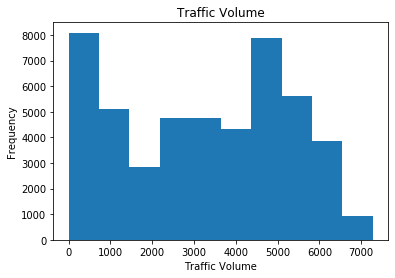

In [164]:
i94['traffic_volume'].plot.hist()
plt.title('Traffic Volume')
plt.xlabel('Traffic Volume')
plt.show()

In [165]:
#reviewing statistics of the the column
i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The distribution of the histogram is bimodal with two peaks between 0 and 500, and 4500-5000.

The hourly traffic volume varies from 0 to 7280, with a mean average of 3259. 25% of the time, the volume is 4933 and above, meanwhile 25% of the time the volume is 1193 and below which is less than a quarter of the busiest time frame.

As previously mentioned, time could play a factor. ie, 25% of the time with low volume could be during nighttime.

## Comparing Traffic Volume - Day vs Night

For the purposes of comparing the data into daytime and nighttime, data for hours between 7am and 7pm will be classified as day, while hours between 7pm and 7am will be grouped together as night.

In [166]:
#transform date_time column to datetime
i94['date_time'] = pd.to_datetime(i94['date_time'])

#use the 'dt.hour' method to isolate hour from datetime and group data accordingly
i94_day = i94.copy()[(i94['date_time'].dt.hour >= 7) & (i94['date_time'].dt.hour < 19)]
print(i94_day.shape)

i94_night = i94.copy()[(i94['date_time'].dt.hour >= 19) | (i94['date_time'].dt.hour < 7)]
print(i94_night.shape)

(23877, 9)
(24327, 9)


The day data has a few less rows, suggesting that there are some missing rows.

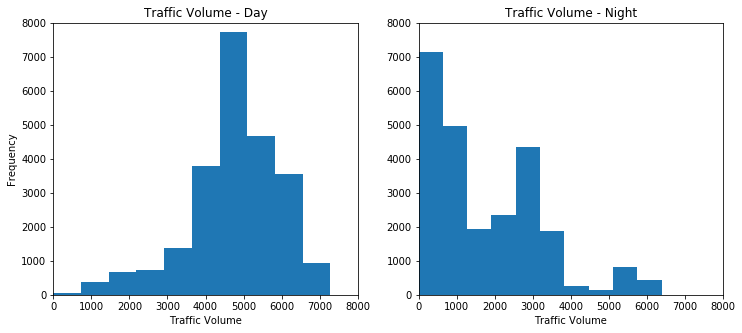

In [167]:
#set size of grid chart
plt.figure(figsize=(12,5))

#position first plot on index position 1 of grid with 1 row and 2 columns
plt.subplot(1,2,1)
i94_day['traffic_volume'].plot.hist() #plot histogram of 'day' traffic volume
plt.title('Traffic Volume - Day') #add title
plt.xlabel('Traffic Volume') #add x-axis label
plt.xlim(0,8000) #plot x-axis data on range of 0-8000
plt.ylim(0,8000) #plot y-axis data on range of 0-8000

#position second plot on index position 2 grid chart
plt.subplot(1,2,2)
plt.hist(i94_night['traffic_volume'])
plt.title('Traffic Volume - Night')
plt.xlabel('Traffic Volume')
plt.xlim(0,8000)
plt.ylim(0,8000)
plt.show()

In [168]:
i94_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [169]:
i94_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The plot for the day data is skewed to the left, displaying more occurances of higher traffic volume than lower traffic volume. This suggests that the traffic volume was typically higher during this timeframe.

Meanwhile, the night data is right skewed, where lower traffic volume is the most prevalent, showing that our 'night' hours saw more occurances of low traffic volume.

Comparing the two histograms, higher traffic occurs during the day, while traffic is lighter at night.

This perspective is further supported when reviewing the stats of day and night traffic. The mean average of the daytime traffic volume is nearly triple that of the night time traffic.

In fact during the night hours, 75% of the time traffic volume is less than 2819. This is significantly less than the day time traffic volume, where 75% of the time traffic volume is more than 4252.

Since we are looking for indicators of high traffic volume, we will focus on data from the 'day' time frame for the rest of the analysis.

## Comparing Traffic Volume - Time Period

Having confirmed that traffic is heavier during the day, we can also compare traffic by other time indicators.

By using line graphs we can compare traffic by month, day of the week and time of day.

### Average Traffic by Month

In [170]:
#calculating average traffic volume by month
i94_day['month'] = i94_day['date_time'].dt.month #new column with month data collected
by_month = i94_day.groupby('month').mean() #using 'groupby' to group data by month
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

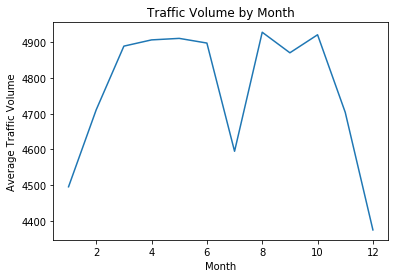

In [171]:
#plot line graph
plt.plot(by_month['traffic_volume'])
plt.title('Traffic Volume by Month')
plt.ylabel('Average Traffic Volume')
plt.xlabel('Month')
plt.show()

The average traffic volume stays relatively level through March to October, with traffic getting lighter through November to February. There is one noticeable exception to these rules - July sees a noticeable drop in traffic volume.

To investigate this further, we can review the average traffic volume in July for each year.

In [172]:
i94_day['year'] = i94_day['date_time'].dt.year
july_year = i94_day[i94_day['month'] == 7]
july_year.groupby('year').mean()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month
year,,,,,,
2013,296.796832,0.529838,0.0,24.245946,4914.354054,7.0
2014,296.225777,0.296686,0.0,52.542522,4871.598240,7.0
2015,296.657288,0.457241,0.0,35.301887,4613.146226,7.0
2016,297.018584,24.633670,0.0,52.534483,3924.923645,7.0
2017,297.139799,0.000000,0.0,41.724311,4734.120301,7.0
2018,296.794566,0.000000,0.0,46.719178,4586.899543,7.0


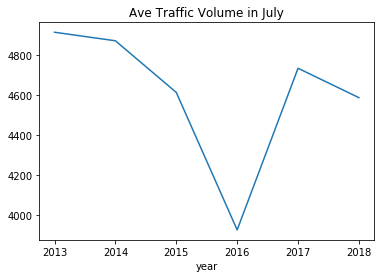

In [173]:
july_year.groupby('year').mean()['traffic_volume'].plot.line()
plt.title('Ave Traffic Volume in July')
plt.show()

The traffic for 2016 showed a significant drop vs the other years that is bringing down the average for total traffic volume in July. A hypothetical reason for this could be a one-off even that affected traffic for the month, such as roadworks or construction.

### Average Traffic by Day of Week

In [174]:
#calculating average traffic by day of week
i94_day['dayofweek'] = i94_day['date_time'].dt.dayofweek
by_dayofweek = i94_day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

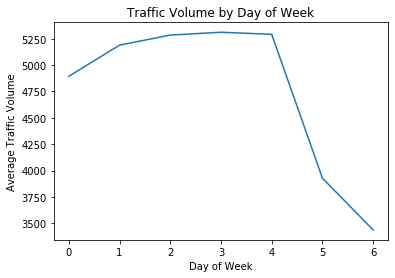

In [175]:
#plot line graph
plt.plot(by_dayofweek['traffic_volume'])
plt.title('Traffic Volume by Day of Week')
plt.ylabel('Average Traffic Volume')
plt.xlabel('Day of Week')
plt.show()

Traffic is higher during business days (Monday to Friday) with traffic volume over 5000 for all days except for Monday. Weekend days see a significant drop off in traffic to below 4000.

As we continue to investigate further time indicators of high traffic to a more granular level of detail, we will only focus on data from business days of the week.

### Traffic by Time of Day

Before analysing traffic by time of day, data from business days and weekends must be separated for analysis, otherwise the weekend traffic volume values will bring down our total averages.

In [176]:
#identifying business days, 0-4, and weekend days, 5-6.
i94_day['hour'] = i94_day['date_time'].dt.hour
business_days = i94_day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = i94_day.copy()[day['dayofweek'] >= 5] # 5 == Saturday

#calculating average traffic by hour for business and weekend days
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print('Business days by hour:')
print(by_hour_business['traffic_volume'])

print('Weekend days by hour:')
print(by_hour_weekend['traffic_volume'])

Business days by hour:
hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
Weekend days by hour:
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


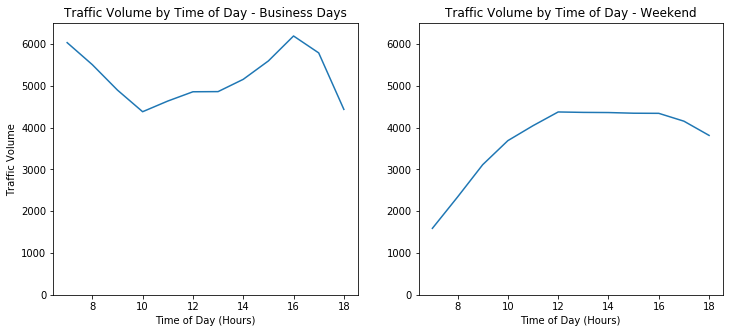

In [177]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line() #plot line graph
plt.title('Traffic Volume by Time of Day - Business Days')
plt.ylabel('Traffic Volume')
plt.xlabel('Time of Day (Hours)')
plt.ylim(0,6500)

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic Volume by Time of Day - Weekend')
plt.xlabel('Time of Day (Hours)')
plt.ylim(0,6500)
plt.show()

Traffic volume is higher during the business days, where the even the lowest traffic time is in line with the highest traffic time on the weekend.

There are two clear peaks during the business days, both with traffic volume around 6000. The peaks occur in the mornings around 7am, and evenings aroung 4pm. These are around the times that a lot of people travel to school and/or work.

For the weekend, the traffic volume at 7am is at its lowest - opposite to the business days. The weekends don't see peaks either. Instead there is a slow increase throughout the day until midday where it stays around the same volume through the afternoon.

### Conclusion - Time Indicators

In conclusion, traffic is typically higher during the months of March to October, dropping off through the winter months. Meanwhile, weekdays around the times of 7am and 4pm have the highest traffic volume.

## Comparing Traffic Volume - Weather Indicators

Along with time indicators, the weather could also impact traffic so we will analyset his hypothesis further.

In [178]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


### Reviewing Correlations between Weather and Traffic

A few of the columns related to weather have numeric values: temp, rain_1h, and snow_1h. This data type allows us to review correlations between these weather indicators and traffic volume.

Daytime data will be used as we predviously determined it sees higher traffic volume, making it more appropriate for use as we identify indicators of high traffic.

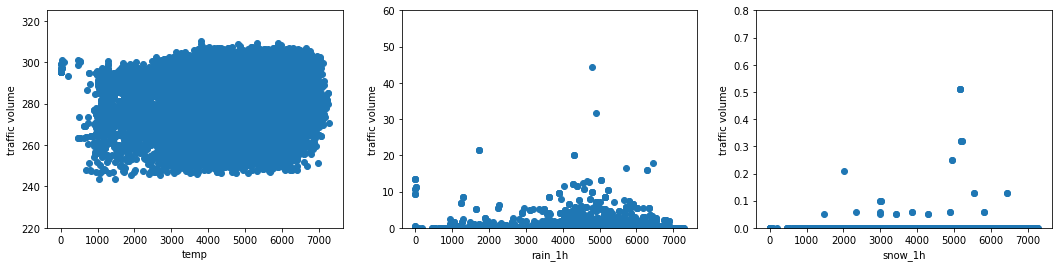

In [179]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
plt.scatter(i94_day['traffic_volume'],i94_day['temp'])
plt.ylim(220,325)
plt.xlabel('temp')
plt.ylabel('traffic volume')

plt.subplot(1,3,2)
plt.scatter(i94_day['traffic_volume'],i94_day['rain_1h'])
plt.ylim(0,60)
plt.xlabel('rain_1h')
plt.ylabel('traffic volume')

plt.subplot(1,3,3)
plt.scatter(i94_day['traffic_volume'],i94_day['snow_1h'])
plt.ylim(0,0.8)
plt.xlabel('snow_1h')
plt.ylabel('traffic volume')
plt.show()

### Traffic by Weather Type

The 'weather_main' and 'weather_description' columns can also be used to help identify any weather indicators.

We can review the averages of each weather type by grouping the data together.

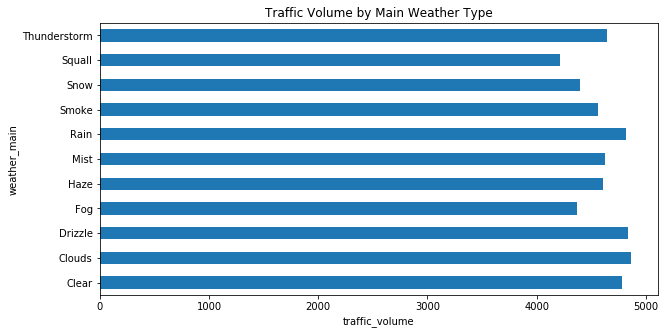

In [200]:
by_weather_main = i94_day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh(figsize=(10,5))
plt.title('Traffic Volume by Main Weather Type')
plt.xlabel('traffic_volume')
plt.show()

The traffic volume doesn't exceed for 5000 for any of these main types of weather.

This exercise will repeated for the other weather-related column - weather_description.

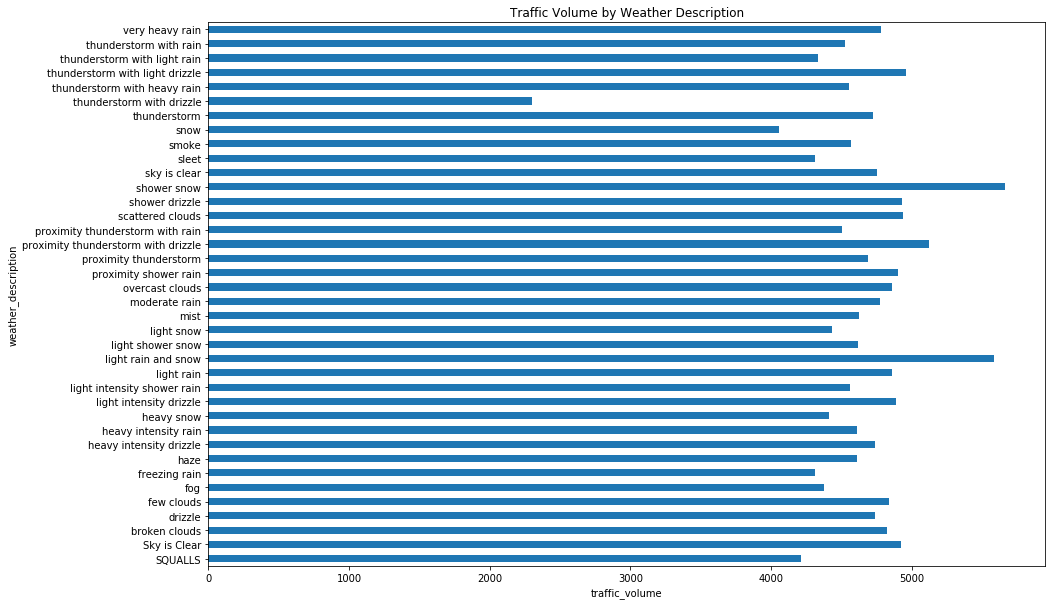

In [209]:
by_weather_desc = i94_day.groupby('weather_description').mean()
by_weather_desc['traffic_volume'].plot.barh(figsize=(15,10))
plt.title('Traffic Volume by Weather Description')
plt.xlabel('traffic_volume')
plt.show()

The weather_description column provides more detail around the weather conditions and identifies three groups where traffic volume exceeds 5000: 'shower snow', 'proximity thunderstorm with rain' and 'light rain and snow'.

While all three are related to some form of precipitation, many other types of weather are also. Upon review of the list of the weather conditions described, these three do not necessarily refer to the least or most severe conditions for travel.

While we cannot draw this conclusion from the data for certain, one hypothesis could be that less people travel by car in the nicest weather, maybe opting to travel less or by other means of local transport such as bicycle). Similarly, drivers might avoid travelling during periods of the most severe weather conditions due to the increased risk.

## Conclusion

In this project, time and weather indicators were reviewed to identify indicators for heavy traffic.

- The highest traffic volume occurred during week/business days with two peaks around 7am and 4pm.

- The weather indicators were less clear, but the traffic volume did increase during periods of light precipitation, when compared to dry or severe weather conditions.

- The months of February to October, when weather conditions are generally warmer and there is a lower likelihood of severe weather such as ice and snow. Considering the traffic volume is lower during times of severe or adverse travel conditions, this does make sense considering the data was collected in Minneapolis, one of the most northern states in the United States